In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [2]:
# Lowercase the text, remove extra spaces, and remove numbers
def clean_text(text):
    text = text.lower()  # Normalize text to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = text.strip()  # Remove leading/trailing spaces
    return text

In [9]:
# This is the text
#text = """
#'The Eiffel Tower is one of the most iconic landmarks in Paris, France. 
#It was constructed between 1887 and 1889. The tower stands at 324 meters tall and is visited by millions of tourists each year.
#"""

#text  = """
#what is bitcoin Bitcoin is the first decentralized digital currency Bitcoins are digital coins you can send through the internet compared to other Alternatives Bitcoins have a number of advantages Bitcoins are transferred directly from person to person via the net without going through a bank or Clearing House this means that the fees are much lower you can use them in every country your account cannot be Frozen and there are no prerequisites or arbitrary limits let's look at how it works Bitcoins are generated all over the internet by anybody running a free application called a Bitcoin miner mining requires a certain amount 
#of work for each block of coins this amount is automatically adjusted by the network such that Bitcoins are always created at a predictable and limited rate your Bitcoins are stored in your digital wallet which 
#might look familiar if you use online banking when you transfer Bitcoins an electronic signature is added after a few minutes the transaction is verified by a minor and permanently and anonymously stored in the 
#network the Bitcoin software is completely open source and anybody can review the code Bitcoin is changing Finance the same way the web changed publishing when everyone has access to a global market great ideas 
#flourish let's look at some examples of how Bitcoins are already used today you can purchase video games gifts books servers and alpaca socks several currency exchanges exist where you can trade your Bitcoins for dollars euros and more Bitcoins are a great way for small businesses and Freelancers to get noticed it doesn't cost anything to start accepting them there are no chargebacks or fees and you'll get additional business from the Bitcoin economy for your first Bitcoins and more information visit weusecoins tocom
#"""

text = """
Bitcoins are digital coins you can send through the internet compared to other Alternatives Bitcoins have a number of advantages Bitcoins are transferred directly from person to person via the net without going through a bank or Clearing House. Bitcoins are a great way for small businesses and Freelancers to get noticed it doesn't cost anything to start accepting them there are no chargebacks or fees.
"""

In [10]:
### TF-IDF

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', preprocessor=clean_text)

# Fit and transform the text to extract the top words
tfidf_matrix = vectorizer.fit_transform([text])

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Get the scores (importance of the words)
scores = tfidf_matrix.toarray().flatten()

# Create a list of words and their corresponding scores
word_scores = list(zip(feature_names, scores))

# Sort the words by their importance (descending)
sorted_word_scores = sorted(word_scores, key=lambda x: x[1], reverse=True)

# Display the top topics/keywords
top_keywords = [word for word, score in sorted_word_scores[:5]]  # Top 5 keywords
print(top_keywords)

['bitcoins', 'person', 'accepting', 'advantages', 'alternatives']


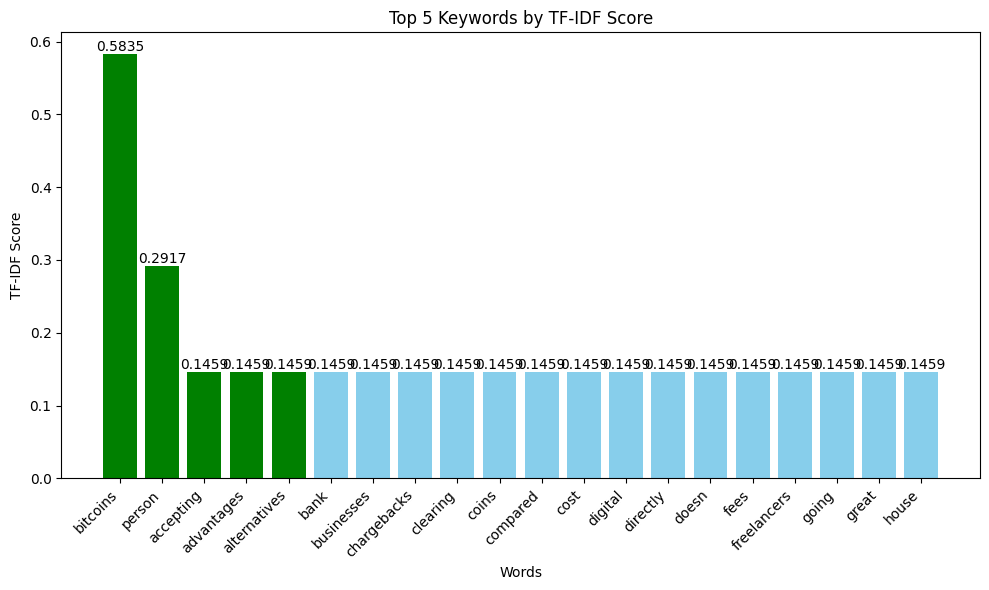

In [11]:
import matplotlib.pyplot as plt

CUT_N = 20
TOP_N = 5

words = [word for word, score in sorted_word_scores[:CUT_N]]
scores = [score for word, score in sorted_word_scores[:CUT_N]]

colors = ['green' if i < TOP_N else 'skyblue' for i in range(len(words))]

plt.figure(figsize=(10, 6))
bars = plt.bar(words, scores, color=colors)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Words")
plt.ylabel("TF-IDF Score")
plt.title(f"Top {TOP_N} Keywords by TF-IDF Score")


# Add the score value on top of each bar
for bar in bars:
    height = bar.get_height()  # Get the height of each bar (the score)
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', 
             ha='center', va='bottom', fontsize=10)  # Add text at the top of the bar

plt.tight_layout()
plt.show()

In [6]:
from rake_nltk import Rake

In [12]:


# Initialize RAKE
rake = Rake(language='english')

# Extract keywords
rake.extract_keywords_from_text(text)

# Get the ranked phrases
top_keywords_with_scores = rake.get_ranked_phrases_with_scores()

top_keywords = [word for score, word in top_keywords_with_scores] 

# Display the top keywords/phrases
print(top_keywords[:TOP_N])  # Show top 5 phrases

['net without going', 'transferred directly', 'start accepting', 'small businesses', 'internet compared']


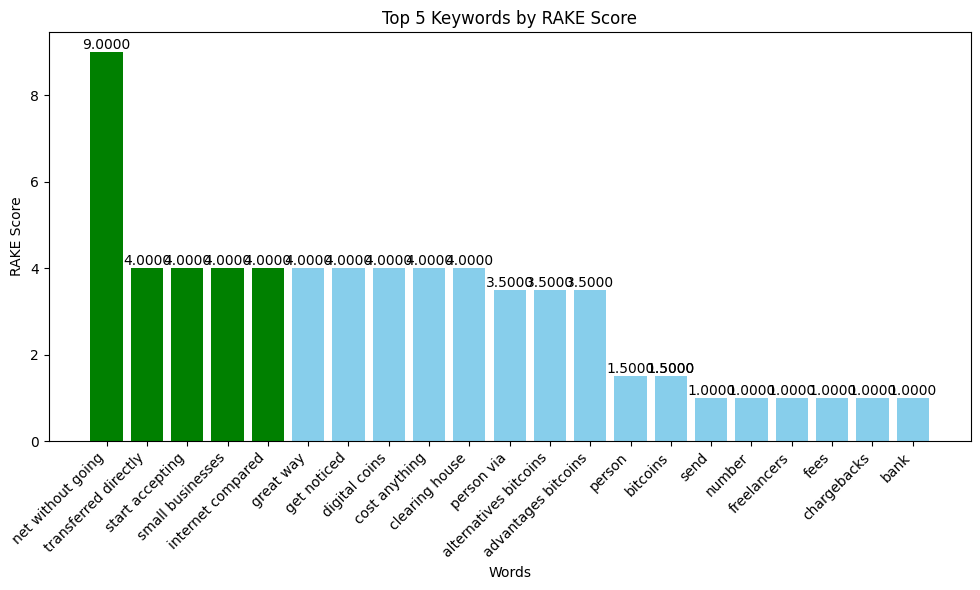

In [13]:
words = [word for score, word in top_keywords_with_scores] 
scores = [score for score, word in top_keywords_with_scores]

colors = ['green' if i < TOP_N else 'skyblue' for i in range(len(words))]

plt.figure(figsize=(10, 6))
bars = plt.bar(words, scores, color=colors)

plt.xticks(rotation=45, ha="right")
plt.xlabel("Words")
plt.ylabel("RAKE Score")
plt.title(f"Top {TOP_N} Keywords by RAKE Score")


# Add the score value on top of each bar
for bar in bars:
    height = bar.get_height()  # Get the height of each bar (the score)
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', 
             ha='center', va='bottom', fontsize=10)  # Add text at the top of the bar

plt.tight_layout()
plt.show()

